# **QUESTION 1**

**Use the function 3𝑥^2 − 3𝑥 + 4 to get its minimum value using Gradient Descent Algorithm.
Plot the necessary graphs and compare the minimum value with theoretical minimum.**

**Import libraries**

In [ ]:
import numpy as np
import torch
import torch.nn as nn
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import numpy as np
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
%matplotlib inline

**Given Function**

In [ ]:
def fx(x):
  return 3*x**2 - 3*x +4

#derivative function
def deriv(x):
  return 6*x - 3

**Plot the Given function and its derivative**

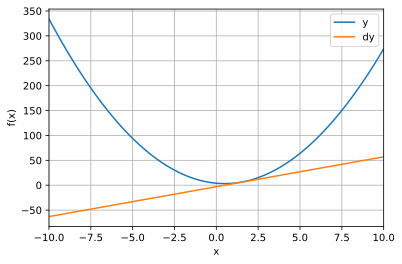

In [ ]:

#define a range for x
x = np.linspace(-10, 10, 100)  

#plotting
plt.plot(x,fx(x),x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [ ]:
#random starting point
localmin = np.random.choice(x,1)
print(localmin)

#Learning parameters
learning_rate = .01  #make changes here
training_epochs = 100 #make changes here

#run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

localmin

[3.93939394]


array([0.50706752])

**Plotting the results**

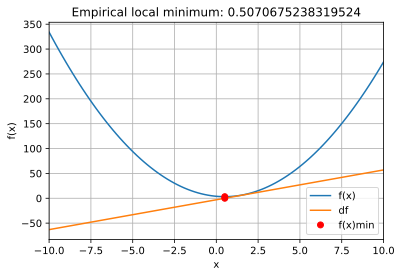

In [ ]:

plt.plot(x,fx(x),x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x)min'])
plt.title('Empirical local minimum: %s' %localmin[0])
plt.show()

In [ ]:
#random staring point
localmin = np.random.choice(x,1)

#learning parameters
learning_rate = .01 #make changes here 
training_epochs = 100 #make changes here 

#run through training and store all the results
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,:] = localmin,grad

<ipython-input-17-f2575ebb76a5>:13: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  modelparams[i,:] = localmin,grad


**Plot the Gradients over iterations**

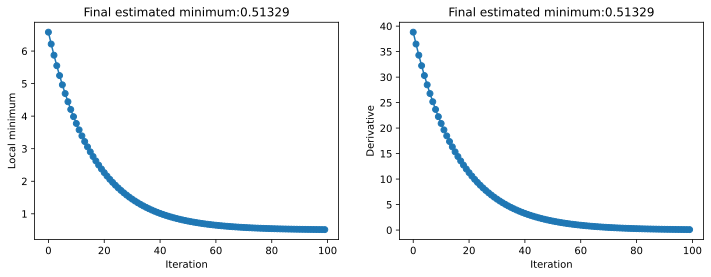

In [ ]:

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum:{localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()


# **QUESTION 2**

**Develop an ANN model of regression for predicting the values.**

**Import Libraries**

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


**Define the model**

In [ ]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)
        
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x


model = ANN()





```
# another hidden layer
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 5)
        self.fc3 = nn.Linear(5, 1)
        self.act1 = nn.Sigmoid()
        self.act2 = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.fc1(x))
        x = self.act2(self.fc2(x))
        x = self.fc3(x)
        return x


model = ANN()

```



**Define the loss function and optimizer**

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) #make change to lr here 

**Generate some data for training**

In [ ]:
x_train = torch.linspace(-10, 10, 100).reshape(-1, 1)
y_train = x_train + torch.randn(x_train.shape) * 2

**Train the model**

In [ ]:
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 1 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 37.173587799072266
Epoch 2, Loss: 27.197359085083008
Epoch 3, Loss: 19.498266220092773
Epoch 4, Loss: 14.615865707397461
Epoch 5, Loss: 11.721675872802734
Epoch 6, Loss: 10.014540672302246
Epoch 7, Loss: 8.988922119140625
Epoch 8, Loss: 8.345442771911621
Epoch 9, Loss: 7.911923408508301
Epoch 10, Loss: 7.592095375061035
Epoch 11, Loss: 7.334692001342773
Epoch 12, Loss: 7.1154351234436035
Epoch 13, Loss: 6.9256720542907715
Epoch 14, Loss: 6.763122081756592
Epoch 15, Loss: 6.624937534332275
Epoch 16, Loss: 6.506417751312256
Epoch 17, Loss: 6.403076171875
Epoch 18, Loss: 6.311623573303223
Epoch 19, Loss: 6.229804039001465
Epoch 20, Loss: 6.1560492515563965
Epoch 21, Loss: 6.089210033416748
Epoch 22, Loss: 6.028403282165527
Epoch 23, Loss: 5.9729132652282715
Epoch 24, Loss: 5.92218017578125
Epoch 25, Loss: 5.875804901123047
Epoch 26, Loss: 5.833535671234131
Epoch 27, Loss: 5.795217514038086
Epoch 28, Loss: 5.760695934295654
Epoch 29, Loss: 5.729725360870361
Epoch 30, Loss: 5

**Generate some data for testing**

In [ ]:
x_test = torch.linspace(-10, 10, 50).reshape(-1, 1)
y_test = x_test + torch.randn(x_test.shape) * 2

**Making predictions**

In [ ]:
y_pred = model(x_test)

**Plot the results**

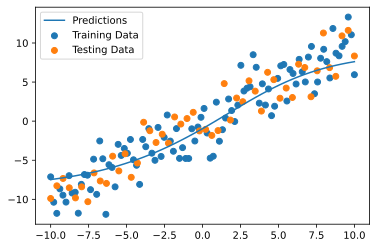

In [ ]:
plt.scatter(x_train.numpy(), y_train.numpy(), label="Training Data")
plt.scatter(x_test.numpy(), y_test.numpy(), label="Testing Data")
plt.plot(x_test.numpy(), y_pred.detach().numpy(), label="Predictions")
plt.legend()
plt.show()